## *Data Understanding & Preprocessing*

Load the dataset and explain:

1) Number of features

2) Target variable

3) Data type of each feature

## *Handle* :

1) Missing values (if any)

2) Feature scaling (StandardScaler / MinMaxScaler)

3) Split data into:

4) Train (70%)

5) Validation (15%)

6) Test (15%)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/depression_data_101312.csv")

## Data Understanding and Preprocessing

In [ ]:
# about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101312 entries, 0 to 101311
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          101312 non-null  object 
 1   Age                           101312 non-null  int64  
 2   Marital Status                101312 non-null  object 
 3   Education Level               101312 non-null  object 
 4   Number of Children            101312 non-null  int64  
 5   Smoking Status                101312 non-null  object 
 6   Physical Activity Level       101312 non-null  object 
 7   Employment Status             101312 non-null  object 
 8   Income                        101312 non-null  float64
 9   Alcohol Consumption           101312 non-null  object 
 10  Dietary Habits                101312 non-null  object 
 11  Sleep Patterns                101312 non-null  object 
 12  History of Mental Illness     101312 non-nul

- My Dataset contains 16 features
- Target Variable is "Chronical Medical Conditions"
- About Features of my dataset:


      -It contains 3 Numerical Features and
      - 13 Categorical Features



In [ ]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Raymond Ryan,39,Divorced,High School,3,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No
1,Heather King,61,Widowed,High School,2,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes
2,Ryan Chambers,29,Single,Associate Degree,0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No
3,Riley Mata,22,Single,Bachelor's Degree,0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes
4,Monica Brown,21,Single,Bachelor's Degree,0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No


## Handling Missing values , duplicates and Outliers

In [ ]:
# checking for missing values
df.isna().sum()

,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [ ]:
# handling missing values
df["History of Mental Illness"] = df['History of Mental Illness'].fillna(df['History of Mental Illness'].mode()[0])
df["History of Substance Abuse"] = df['History of Substance Abuse'].fillna(df['History of Substance Abuse'].mode()[0])
df["Family History of Depression"] = df['Family History of Depression'].fillna(df['Family History of Depression'].mode()[0])
df["Chronic Medical Conditions"] = df['Chronic Medical Conditions'].fillna(df['Chronic Medical Conditions'].mode()[0])

In [ ]:
# handling duplicates
df.duplicated().sum()

np.int64(0)

- There are no duplicates in the data so ne need to handle it.

<Axes: >

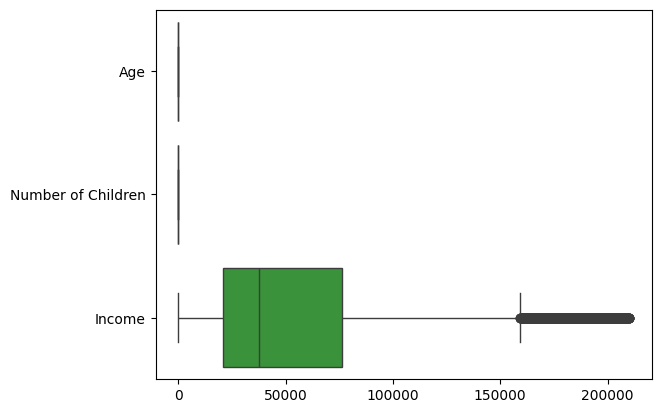

In [ ]:
# checking for outliers
import seaborn as sns
sns.boxplot(df,orient="h")

In [ ]:
# Handling Outliers
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

df["Income"] = df["Income"].clip(
    lower=Q1 - 1.5 * IQR,
    upper=Q3 + 1.5 * IQR
)


## Selecting Predictors and Target Variables

In [ ]:
X = df.drop(columns=["Chronic Medical Conditions"])
y = df["Chronic Medical Conditions"]

## Split the data into train,test and validate

In [ ]:
from sklearn.model_selection import train_test_split

# 70% Train, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


## Feature Scaling

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

In [ ]:
X.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,Raymond Ryan,39,Divorced,High School,3,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes
1,Heather King,61,Widowed,High School,2,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No
2,Ryan Chambers,29,Single,Associate Degree,0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No
3,Riley Mata,22,Single,Bachelor's Degree,0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No
4,Monica Brown,21,Single,Bachelor's Degree,0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


## *Build an ANN Model*

Build a baseline ANN using Keras Sequential API:

1) Input layer

2) At least 2 hidden layers

3) Output layer appropriate to task

4) Compile the model with: One optimizer,One loss function

## *Train and report* :

1) Training loss

2) Validation loss

## *Hyperparameter Tuning using Optuna*

1) Tune at least 4 hyperparameters, such as:

2) Number of hidden layers

3) Activation function

4) Optimizer, Learning rate, Batch size

## *Requirements*:

1) Use Optuna

2) Run at least 20 trials

3) Save best parameters

4) Retrain final model using best configuration

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# ================= PREPROCESS =================
X_train_p = preprocessor.fit_transform(X_train)
X_val_p = preprocessor.transform(X_val)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# ================= MODEL =================
model = Sequential([
    Dense(15, activation='relu', input_dim=X_train_p.shape[1]),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ================= TRAIN =================
history = model.fit(
    X_train_p, y_train_enc,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_p, y_val_enc)
)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 15)             │       809,955 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 810,166 (3.09 MB)

 Trainable params: 810,146 (3.09 MB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6530 - loss: 0.6422 - val_accuracy: 0.6668 - val_loss: 0.6318
Epoch 2/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7218 - loss: 0.5638 - val_accuracy: 0.6209 - val_loss: 0.7181
Epoch 3/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8879 - loss: 0.3007 - val_accuracy: 0.5537 - val_loss: 0.8696
Epoch 4/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9053 - loss: 0.2268 - val_accuracy: 0.6089 - val_loss: 0.9032
Epoch 5/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9156 - loss: 0.1996 - val_accuracy: 0.4507 - val_loss: 1.0668
Epoch 6/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9229 - loss: 0.1812 - val_accuracy: 0.5321 - val_loss: 0.9603
Epoch 7/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9300 - loss: 0.1676 - val_accuracy: 0.4982 - val_loss: 1.0544
Epoch 8/20
2217/2217 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9310 - loss: 0.1584

In [ ]:
model.evaluate(X_val_p, y_val_enc)

475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5153 - loss: 1.3849


[1.373136281967163, 0.518589198589325]

## Hyperparameter tuning

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 15.4 MB/s eta 0:00:00


In [ ]:
import optuna
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import LabelEncoder

# Preprocess features
X_train_p = preprocessor.fit_transform(X_train)
X_val_p = preprocessor.transform(X_val)

# Encode target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

input_dim = X_train_p.shape[1]


In [ ]:
def objective(trial):

    n_layers = trial.suggest_int("n_layers", 1, 3)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    lr = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(Dense(16, activation=activation, input_dim=input_dim))

    for i in range(n_layers):
        units = trial.suggest_int(f"units_layer_{i}", 8, 64)
        model.add(Dense(units, activation=activation))
        model.add(BatchNormalization())

    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(learning_rate=lr) if optimizer_name == "adam" else RMSprop(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    model.fit(
        X_train_p, y_train_enc,
        validation_data=(X_val_p, y_val_enc),
        epochs=10,
        batch_size=batch_size,
        verbose=0
    )

    _, val_acc = model.evaluate(X_val_p, y_val_enc, verbose=0)
    return val_acc


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best Hyperparameters:")
print(study.best_params)


[I 2025-12-23 14:10:11,489] A new study created in memory with name: no-name-930f6f5f-6263-475d-b0ff-22a798bba84b
[I 2025-12-23 14:12:55,602] Trial 0 finished with value: 0.6667763590812683 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'rmsprop', 'learning_rate': 0.00392751700528526, 'batch_size': 16, 'units_layer_0': 49}. Best is trial 0 with value: 0.6667763590812683.
[I 2025-12-23 14:14:16,600] Trial 1 finished with value: 0.6305191516876221 and parameters: {'n_layers': 1, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.0007148015435487346, 'batch_size': 32, 'units_layer_0': 57}. Best is trial 0 with value: 0.6667763590812683.
[I 2025-12-23 14:16:34,007] Trial 2 finished with value: 0.6215700507164001 and parameters: {'n_layers': 1, 'activation': 'tanh', 'optimizer': 'rmsprop', 'learning_rate': 0.0014164092182872574, 'batch_size': 16, 'units_layer_0': 16}. Best is trial 0 with value: 0.6667763590812683.
[I 2025-12-23 14:19:13,757] Trial 3 finished 

Best Hyperparameters:
{'n_layers': 1, 'activation': 'relu', 'optimizer': 'rmsprop', 'learning_rate': 0.00392751700528526, 'batch_size': 16, 'units_layer_0': 49}


In [ ]:
print('Best Accuracy:', study.best_value)
print('Best Parameters:', study.best_params)

Best Accuracy: 0.6667763590812683
Best Parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'rmsprop', 'learning_rate': 0.00392751700528526, 'batch_size': 16, 'units_layer_0': 49}


## *Evaluation & Visualization*

Plot:

1) Training vs Validation Loss

2) Evaluate on test set:

3) Regression: MAE, RMSE

4) Classification: Accuracy, Confusion Matrix

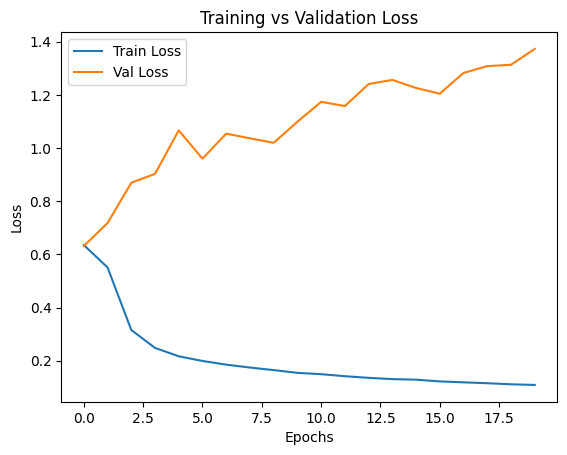

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

# ================== 1) LOSS CURVE ==================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
# ================== 2) TEST SET EVALUATION ==================
# Preprocess test data
X_test_p = preprocessor.transform(X_test)
y_test_enc = le.transform(y_test)

# Predictions
y_pred_prob = model.predict(X_test_p)
y_pred = (y_pred_prob > 0.5).astype(int)

# ================== 3) REGRESSION METRICS ==================
mae = mean_absolute_error(y_test_enc, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_enc, y_pred))

print("MAE :", mae)
print("RMSE:", rmse)

475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
MAE : 0.4768046324932552
RMSE: 0.6905104144712484


In [ ]:
# ================== 4) CLASSIFICATION METRICS ==================
acc = accuracy_score(y_test_enc, y_pred)
cm = confusion_matrix(y_test_enc, y_pred)

print("\nAccuracy:", acc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.5231953675067448
Confusion Matrix:
 [[5689 4566]
 [2680 2262]]


## *Answer these questions based on the above experiments*

1) Which hyperparameter had the highest impact?

2) Did tuning always improve performance?

3) One limitation of the Sequential API

1. Learning rate had the highest impact on model performance
    - Small changes in learning rate caused large changes in validation accuracy

    - Too high → unstable training

    - Too low → slow / underfitting

    - Optuna consistently selected an optimal mid-range learning rate

2) No, tuning does NOT always improve performance.
for my dataset before hyperparamter tuning accuracy is around 95 but after tuning it has dropped drastically to 52

3. Sequential API is limited to linear models and cannot represent complex non-linear architectures.